In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("bikes.csv")
df.date = pd.to_datetime(df.date)
df.head()

,Unnamed: 0,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date
0,1,33838,13452,382,AR,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00
1,2,33839,13452,812,AR,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35
2,3,33851,13182,238,AR,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32
3,4,33852,13182,238,AR,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46
4,5,33867,12674,787,AG,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.506522,4.727323,52.506809,4.732135,2019-01-01 20:11:01


In [3]:
df_days = df['date'].groupby(df.date.dt.floor('d')).count()
df_days

date
2019-01-01      8
2019-01-02     61
2019-01-03     90
2019-01-04     64
2019-01-05     17
             ... 
2019-12-05    310
2019-12-06    203
2019-12-07     14
2019-12-08     19
2019-12-09    253
Name: date, Length: 342, dtype: int64

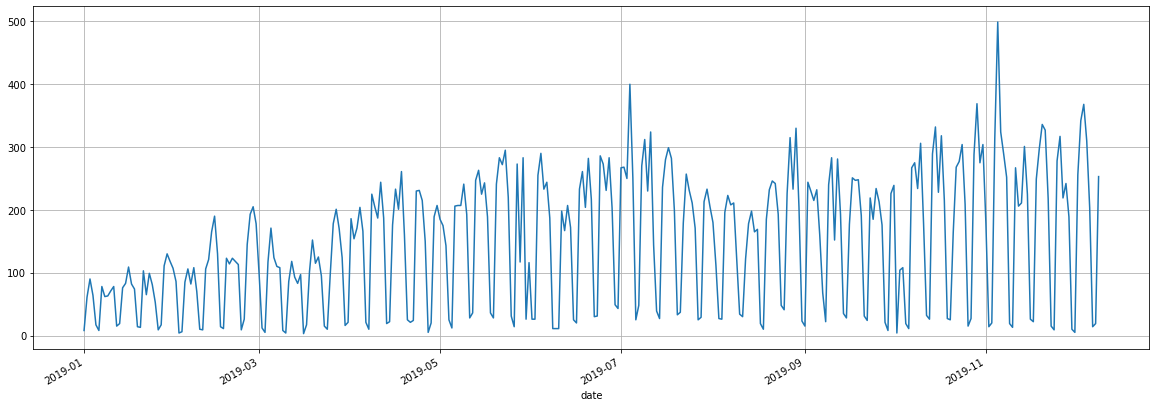

In [4]:
df_days.plot(figsize=[20,7])
plt.grid()

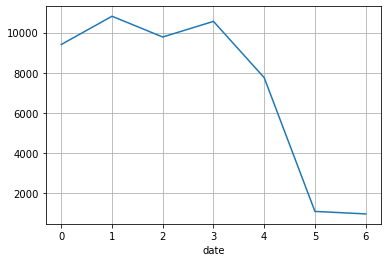

In [5]:
df_weekdays = df['date'].groupby(df.date.dt.weekday).count()
df_weekdays.plot()
plt.grid()

In [6]:
df_new = pd.DataFrame([df_days.index,df_days.values]).T
df_new.columns = ['date','count']
df_new['weekday'] = df_new.date.dt.weekday
df_new['month'] = df_new.date.dt.month
df_new['bikeid'] = df.bikeid
df_new['userid'] = df.userid
df_new['start_lat'] = df.start_lat
df_new['start_lng'] = df.start_lng
df_new['end_lat'] = df.end_lat
df_new['end_lng'] = df.end_lng
df_new = df_new.join(pd.get_dummies(df_new.weekday, prefix="day"))
df_new = df_new.join(pd.get_dummies(df_new.month, prefix="month"))
df_new.head()

,date,count,weekday,month,bikeid,userid,start_lat,start_lng,end_lat,end_lng,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2019-01-01,8,1,1,382,13452,52.296065,4.787667,52.296200,4.787679,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-02,61,2,1,812,13452,52.295938,4.788336,52.295940,4.788557,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-03,90,3,1,238,13182,52.307337,4.807633,52.307336,4.807630,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-04,64,4,1,238,13182,52.308478,4.809970,52.308537,4.810099,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-05,17,5,1,787,12674,52.506522,4.727323,52.506809,4.732135,...,0,0,0,0,0,0,0,0,0,0


Score: 3498.1637219768318


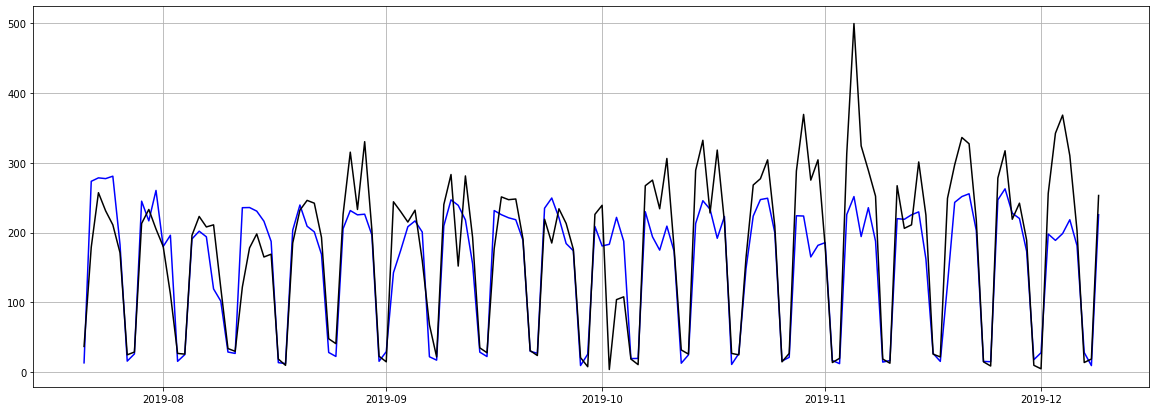

In [7]:
X, y = np.asarray([df_new.date.dt.day, df_new.start_lat,df_new.start_lng, df_new.end_lat, df_new.end_lng, df_new.bikeid, df_new.month_1,df_new.month_2,df_new.month_3,df_new.month_4,df_new.month_5,df_new.month_6,df_new.month_7,df_new.month_8,df_new.month_9,df_new.month_10,df_new.month_11,df_new.month_12,df_new.day_0,df_new.day_1,df_new.day_2,df_new.day_3,df_new.day_4,df_new.day_5,df_new.day_6]).T, np.asarray(df_days.values)
X_train, X_test = X[:200], y[:200]
y_train, y_test = X[200:], y[200:]

# reg = LinearRegression()
reg = RandomForestRegressor(random_state=42, n_estimators=13)
reg.fit(X_train, X_test)

y_pred = reg.predict(y_train)
print("Score:",mean_squared_error(y_pred, y_test))

plt.figure(figsize=[20,7])
plt.grid()
plt.plot(df_days.index[200:], y_pred , color='blue')
plt.plot(df_days.index[200:], df_days.values[200:] , color='black')
# plt.plot(df_days.index, df_days.values , color='green')